In [1]:
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os
import pandas as pd

In [20]:
# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'

domain = "viewit.ae" # <- put your domain to be crawled
full_url = "https://viewit.ae/" # <- put your domain to be crawled with https or http

In [2]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

In [ ]:
os.listdir('text/viewit.ae')

In [9]:
# Create text list to store text files
texts = []
domain = 'viewit.ae'

# Get all the text files in the text directory
for file in os.listdir('text/'+domain+'/'):

    # Open file and read text
    with open('text/'+domain+'/'+file, 'r', encoding='utf-8') as f:
        text = f.read()

        # Omit first 11 lines and last 4 lines, and replace -, _, and #update with spaces.
        texts.append((file[10:-4].replace('-', ' ').replace('_', ' ').replace('#update', ' '), text))


In [10]:
texts

[('',
  '\n\n\nView IT - Dubai\'s number one property website for properties for sale and to rent.\n\n\n  \n            Buy\n            Rent   About Us   \n  Viewings made\n  \n    easy\n   \n \n        Buy\n      \n        Rent\n             \n      ViewIT\n      \n   \n \n        Min Rent\n      \n        20,000\n      \n        30,000\n      \n        40,000\n      \n        50,000\n      \n        60,000\n      \n        70,000\n      \n        80,000\n      \n        90,000\n      \n        100,000\n      \n        110,000\n      \n        120,000\n      \n        130,000\n      \n        140,000\n      \n        150,000\n      \n        160,000\n      \n        170,000\n      \n        180,000\n      \n        190,000\n      \n        200,000\n      \n        225,000\n      \n        250,000\n      \n        275,000\n      \n        300,000\n      \n        350,000\n      \n        400,000\n      \n        500,000\n      \n        750,000\n      \n        1,000,000\n        \n \

In [21]:
text = BeautifulSoup(requests.get(full_url).text, 'html.parser').get_text()
text

'\n\n\nView IT - Dubai\'s number one property website for properties for sale and to rent.\n\n\n  \n            Buy\n            Rent   About Us   \n  Viewings made\n  \n    easy\n   \n \n        Buy\n      \n        Rent\n             \n      ViewIT\n      \n   \n \n        Min Rent\n      \n        20,000\n      \n        30,000\n      \n        40,000\n      \n        50,000\n      \n        60,000\n      \n        70,000\n      \n        80,000\n      \n        90,000\n      \n        100,000\n      \n        110,000\n      \n        120,000\n      \n        130,000\n      \n        140,000\n      \n        150,000\n      \n        160,000\n      \n        170,000\n      \n        180,000\n      \n        190,000\n      \n        200,000\n      \n        225,000\n      \n        250,000\n      \n        275,000\n      \n        300,000\n      \n        350,000\n      \n        400,000\n      \n        500,000\n      \n        750,000\n      \n        1,000,000\n        \n \n       

In [11]:
df = pd.DataFrame(texts, columns=['fname', 'text'])
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('processed/new_scraped.csv')
df.head()

C:\Users\ga201\AppData\Local\Temp\ipykernel_21048\2931785837.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,,. View IT - Dubai's number one property websi...
1,,. View IT - Dubai's number one property websi...
2,about#contact form,about#contact form. View IT - Dubai's number ...
3,about,about. View IT - Dubai's number one property ...
4,listings,listings. View IT Search For Properties B...


In [12]:
import tiktoken

In [13]:
# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding('cl100k_base')

df = pd.read_csv('processed/new_scraped.csv', index_col=0)
df.columns = ['title', 'text']
df.head()

,title,text
0,NaN,. View IT - Dubai's number one property websi...
1,NaN,. View IT - Dubai's number one property websi...
2,about#contact form,about#contact form. View IT - Dubai's number ...
3,about,about. View IT - Dubai's number one property ...
4,listings,listings. View IT Search For Properties B...


<AxesSubplot: >

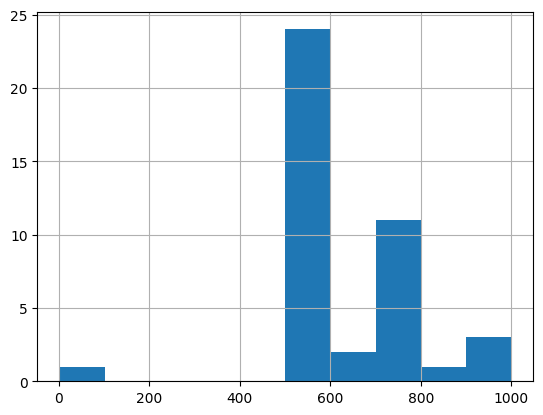

In [14]:
# Tokenize text and save the no. of tokens to new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distributon of number of tokens per row with a histogram
df.n_tokens.hist()

In [17]:
print(df.text[0])

.  View IT - Dubai's number one property website for properties for sale and to rent.     Buy    Rent About Us  Viewings made  easy    Buy    Rent      ViewIT      Min Rent    20,000    30,000    40,000    50,000    60,000    70,000    80,000    90,000    100,000    110,000    120,000    130,000    140,000    150,000    160,000    170,000    180,000    190,000    200,000    225,000    250,000    275,000    300,000    350,000    400,000    500,000    750,000    1,000,000     Max Rent    20,000    30,000    40,000    50,000    60,000    70,000    80,000    90,000    100,000    110,000    120,000    130,000    140,000    150,000    160,000    170,000    180,000    190,000    200,000    225,000    250,000    275,000    300,000    350,000    400,000    500,000    750,000    1,000,000     Min. Beds    1    2    3    4    5    6     ViewIT   Featured Listings  Featured Listings  Jumeirah Park AED 4,800,000 Regional Stunning Garden l Single Row l Regional | Pvt Pool  Villa   3   4   3,063 Sq F